In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")


In [24]:
# Aggregate transaction data for each customer
transactions_agg = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "TransactionID": "count",  # Num
    "Quantity": "sum"
}).reset_index()

In [25]:

# Merge customer profiles with aggregated transaction data
data = customers.merge(transactions_agg, on="CustomerID", how="left").fillna(0)

In [26]:

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_region = pd.DataFrame(
    encoder.fit_transform(data[["Region"]]),
    columns=encoder.get_feature_names_out(["Region"])
)
data = pd.concat([data.drop("Region", axis=1), encoded_region], axis=1)

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ["TotalValue", "TransactionID", "Quantity"]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Select features for clustering
features = data.drop(["CustomerID", "CustomerName", "SignupDate"], axis=1)

c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

In [27]:
# Define parameter grids for clustering algorithms
param_grids = {
    "KMeans": {
        "n_clusters": range(2, 11),
        "init": ["k-means++", "random"],
        "max_iter": [300, 500],
        "random_state": [42]
    },
    "DBSCAN": {
        "eps": [0.1, 0.2, 0.5, 1.0],
        "min_samples": [5, 10, 20]
    },
    "AgglomerativeClustering": {
        "n_clusters": range(2, 11),
        "linkage": ["ward", "complete", "average", "single"]
    },
    "GaussianMixture": {
        "n_components": range(2, 11),
        "covariance_type": ["full", "tied", "diag", "spherical"]
    }
}


In [28]:

# Grid search for each clustering algorithm
best_results = {}
for algo_name, param_grid in param_grids.items():
    best_model = None
    best_params = None
    best_db_index = float("inf")

    print(f"Starting grid search for {algo_name}...")
    for params in ParameterGrid(param_grid):
        if algo_name == "KMeans":
            model = KMeans(**params)
            clusters = model.fit_predict(features)
        elif algo_name == "DBSCAN":
            model = DBSCAN(**params)
            clusters = model.fit_predict(features)
        elif algo_name == "AgglomerativeClustering":
            model = AgglomerativeClustering(**params)
            clusters = model.fit_predict(features)
        elif algo_name == "GaussianMixture":
            model = GaussianMixture(**params)
            clusters = model.fit_predict(features)

        # Only calculate DB Index if clusters are valid
        if len(np.unique(clusters)) > 1:
            db_index = davies_bouldin_score(features, clusters)
            if db_index < best_db_index:
                best_model = model
                best_params = params
                best_db_index = db_index

    # Store the best results for this algorithm
    best_results[algo_name] = {
        "model": best_model,
        "params": best_params,
        "db_index": best_db_index
    }


Starting grid search for KMeans...


c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

Starting grid search for DBSCAN...
Starting grid search for AgglomerativeClustering...


c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

Starting grid search for GaussianMixture...


c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [29]:
# Select the overall best model
best_algo = min(best_results, key=lambda x: best_results[x]["db_index"])
best_model = best_results[best_algo]["model"]
best_params = best_results[best_algo]["params"]
best_db_index = best_results[best_algo]["db_index"]

# Assign clusters from the best model to the dataset
if best_algo in ["KMeans", "GaussianMixture", "AgglomerativeClustering"]:
    data["Cluster"] = best_model.fit_predict(features)
elif best_algo == "DBSCAN":
    data["Cluster"] = best_model.fit_predict(features)

c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [30]:
# Print evaluation results
print("Best Algorithm:", best_algo)
print("Best Parameters:", best_params)
print("Davies-Bouldin Index of Best Model:", round(best_db_index, 4))


Best Algorithm: AgglomerativeClustering
Best Parameters: {'linkage': 'single', 'n_clusters': 2}
Davies-Bouldin Index of Best Model: 0.3362


In [31]:

# Save clustered data
data.to_csv("Customer_Segmentation.csv", index=False)
print("Clustered data saved as Customer_Segmentation.csv")


Clustered data saved as Customer_Segmentation.csv


c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

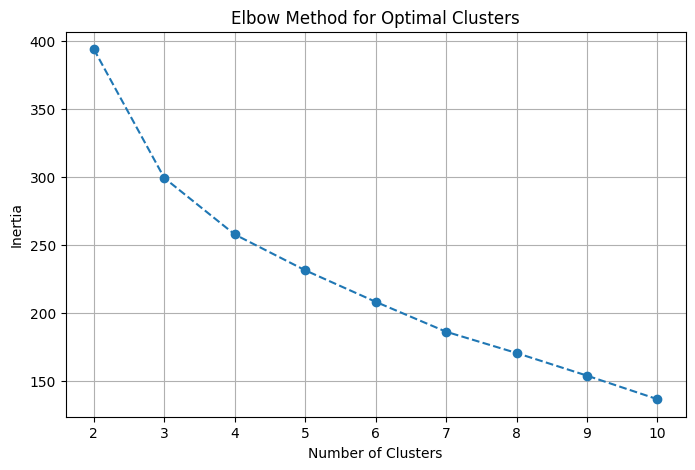

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\NIKHIL SINGH\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

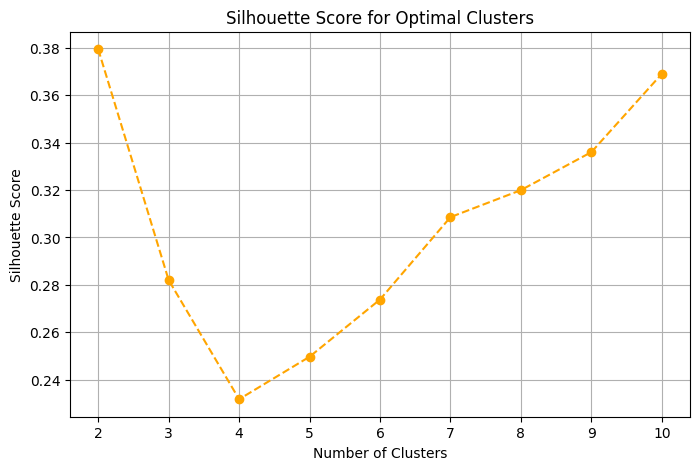

In [33]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(features)
    sil_scores.append(silhouette_score(features, clusters))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


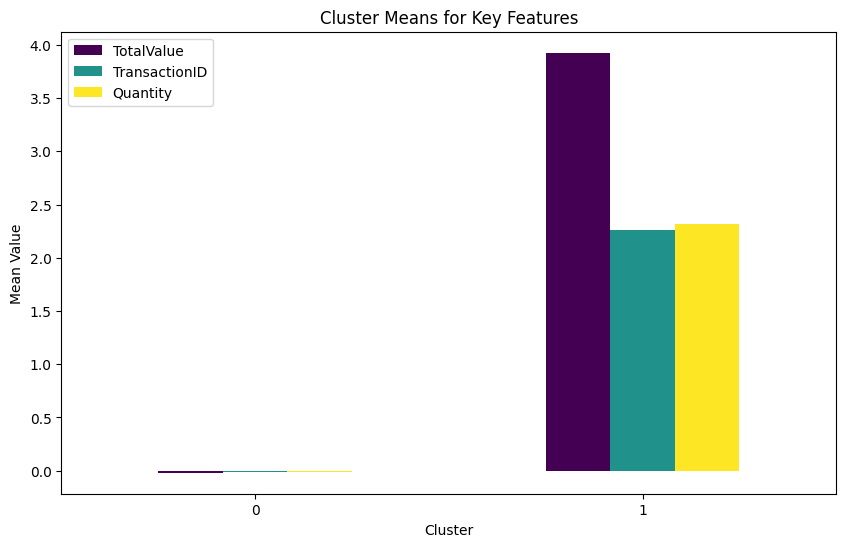

In [34]:
cluster_means = data.groupby('Cluster')[['TotalValue', 'TransactionID', 'Quantity']].mean()

cluster_means.plot(kind='bar', figsize=(10, 6), cmap='viridis')
plt.title('Cluster Means for Key Features')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()


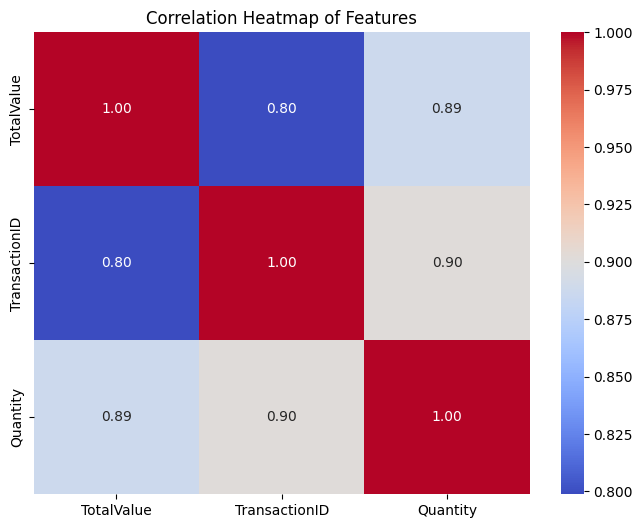

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['TotalValue', 'TransactionID', 'Quantity']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


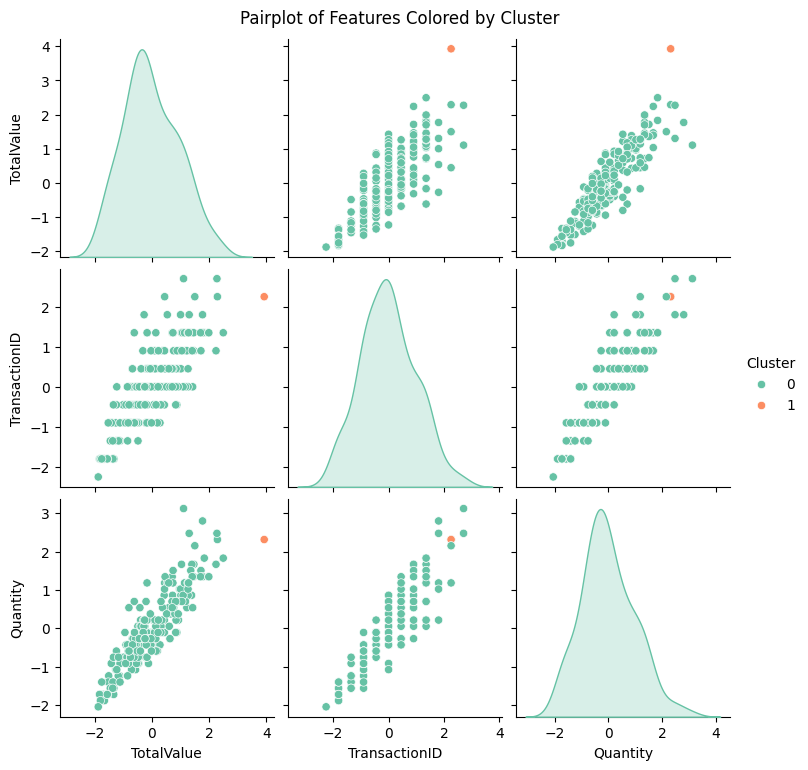

In [36]:
sns.pairplot(data, vars=['TotalValue', 'TransactionID', 'Quantity'], hue='Cluster', palette='Set2', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Features Colored by Cluster', y=1.02)
plt.show()
